In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pickle
from typing import DefaultDict
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

In [3]:
# load the results

results_file = open('../results/meta_perf_vs_num_feats_fixed.pkl', 'rb')
all_results = pickle.load(results_file)
results_file.close()

In [4]:
# (num_trials is just used to verify all evaluations succeeded)
num_trials = 3
metric = "perc_diff_from_best_global"
#metric = 'mae'

# the way this is done now, this needs to exactly match the range from the python file that generated the pickle file.
NUM_FEATS_LIST = [1, 2, 3, 6, 10, 19, 35, 64, 117, 211, 382]
# computed using 
# [int(j) for j in np.logspace(start=0.9, stop=np.log(382)/np.log(2), num=10, endpoint=True, base=2.0)]
# and then adding "2"

models = ['xgboost', 'random', 'knn', 'linear']

In [5]:
results_per_model = {model: DefaultDict(list) for model in models}
for dataset in all_results:
    for trial in all_results[dataset]:
        num_feats = all_results[dataset][trial]['num_feats']
        for model in all_results[dataset][trial]:
            # note: it's not so safe to do this, where we throw away the the num_* and hard-code it later.
            if model in ['num_train', 'num_algs', 'num_feats']: continue
            for n_feats, perf in zip(num_feats, all_results[dataset][trial][model]):
                results_per_model[model][n_feats].append(perf[metric])

In [6]:
means = {}
p1s = {}
p3s = {}
for model in models:
    means[model] = []
    p1s[model] = []
    p3s[model] = []
    # needs to match the range in the python file
    for n_feats in NUM_FEATS_LIST:
        assert len(results_per_model[model][n_feats]) == 19 * num_trials
        means[model].append(np.mean(results_per_model[model][n_feats]))
        p1s[model].append(np.percentile(results_per_model[model][n_feats], 40))
        p3s[model].append(np.percentile(results_per_model[model][n_feats], 60))

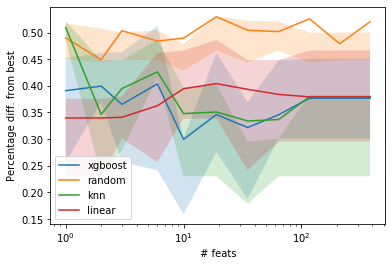

In [11]:
# plot with fill between 40-60% of trials

# note: when plotting mae, random and linear are very bad

x = NUM_FEATS_LIST

for i,model in enumerate(models):
    plt.plot(x, means[model], label = model)
    plt.fill_between(x, p1s[model], p3s[model], alpha=0.2)

plt.xscale('log')
plt.legend()
plt.xlabel('# feats')
plt.ylabel('Percentage diff. from best')

plt.savefig('saved_plots/perf_vs_datasets_plot.png', dpi=160)
plt.show()

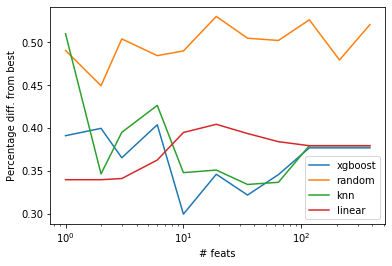

In [10]:
# old plot, with no error bars

x = NUM_FEATS_LIST

for model in models:
    y = means[model]
    plt.plot(x, y, label = model)

plt.xscale('log')
plt.legend()
plt.xlabel('# feats')
plt.ylabel('Percentage diff. from best')

plt.savefig('saved_plots/perf_vs_datasets_plot.png', dpi=160)
plt.show()